## In this fille we will try to apply K-Neighbors to classify the users

## Application of K-Neighbors algorithm for Hololens Data 

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graphiques 3D
from sklearn.neighbors import KNeighborsClassifier


Let's start by applying the Algorithm with players 8 and 9 (those with more data available). We'll use the data generated by sampling the trajectory with a frequency of 1Hz

In [2]:
X = np.genfromtxt('./features/features_p8_p9_1.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_p9_1.csv', delimiter=',')

## As we saw in the Data visualization notebook, our features are highly correlated and thus applying PCA must help to avoid overfitting. Let's do it

In [4]:
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)

# On crée notre modèle pour obtenir 2 composantes
model_pca2 = PCA(n_components = 2)

# On entraîne notre modèle (fit) sur les données
model_pca2.fit(X)

# On applique le résultat sur nos données :
X_reduced2 = model_pca2.transform(X)

## Let's apply K-means now


In [5]:
def visualiser_modele(model):
    
    #levels = [0, 1, 2, 3]
    levels = [7, 8, 9, 10]
    colors = ['red', 'yellow', 'blue']
    cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)
    
    # On crée un tableau de coordonnées pour chaque point du plan (une grille)
    xx, yy = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-1.5, 1.6, 0.1))
    X_grid = np.c_[xx.flatten(), yy.flatten()]

    # On calcule ce que prédit le classifier en chaque point de ce plan
    y_grid = model.predict(X_grid)

    # On dessine ce que le modèle prévoit sur le plan
    plt.contourf(xx, yy, y_grid.reshape(xx.shape), cmap='Spectral')

    # On affiche les points du training en contour noir
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker = "o", norm=norm, cmap=cmap, edgeColor='black')

    # On affiche les points du test en contour blanc
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker ="o",norm=norm, cmap=cmap, edgeColor='white', linewidths=2)
    
#visualiser_modele(model_knn)

Précision : 63%


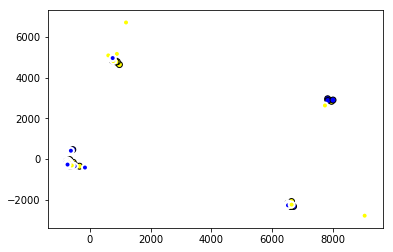

In [8]:
#applying K-means    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

Let's try a 3-dimension PCA now

In [15]:
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca3 = PCA(n_components=3)
model_pca3.fit(X)
X_reduced3 = model_pca3.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced3[:int(l*training_ratio)]
X_test = X_reduced3[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))


Précision : 65%


## The precision doesn't change a lot, altough it is highly variable. Each time we run k-neighbors with a 2-dimension or 3-dimension PCA, precision ranger from 57% to 75%. This is due to the fact that we have a small amount of data, and the selection of the training/test set is random (as it should be).

The precision doesn't change.

## We'll now use the features vector generated by the each pop balloon instead of each second

In [16]:
X = np.genfromtxt('./features/features_p8_p9_pop.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_p9_pop.csv', delimiter=',')

Précision : 68%


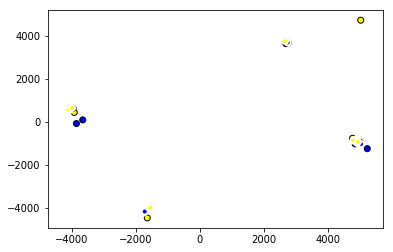

In [18]:

#applying K-Neighbors    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(4)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

It seems that the precision increases in average (we would need to do an average of the precision to proove it) when compared to the data sampled with 1Hz. This can be explained by less "noise" in the data

## We conclude that our algorith performs badly in this dataset when compared to the one that uses Kinect data (for which we have a lot of data instead of 3 minutes of playing). This can only be explained by the small amount of data, since for Hololens we have the same information (position in time) and more (rotation and z-component of position). When more data is available, one should run the algorithm again and compare